In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt



In [2]:
# Load the data
# Assuming you have a CSV file named 'company_data.csv'
data = pd.read_csv('company_data.csv')
data


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [3]:
# Display the first few rows of the dataset
print(data.head())



   Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US  
0         17   Yes  Yes  
1         10   Yes  Yes  
2         12   Yes  Yes  
3         14   Yes  Yes  
4         13   Yes   No  


In [4]:
# Data Preprocessing
# Assume 'Sales' is the target variable
data['Sale_Category'] = pd.cut(data['Sales'], bins=[-float('inf'), 500, 1000, float('inf')], labels=['Low', 'Medium', 'High'])



In [5]:
# Drop the original 'Sales' column
data.drop('Sales', axis=1, inplace=True)



In [6]:
# Encode categorical variables using one-hot encoding
data = pd.get_dummies(data, columns=['ShelveLoc', 'Urban', 'US'], drop_first=True)


In [7]:
# Split the data into features (X) and target variable (y)
X = data.drop('Sale_Category', axis=1)
y = data['Sale_Category']



In [8]:
X

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes
0,138,73,11,276,120,42,17,0,0,1,1
1,111,48,16,260,83,65,10,1,0,1,1
2,113,35,10,269,80,59,12,0,1,1,1
3,117,100,4,466,97,55,14,0,1,1,1
4,141,64,3,340,128,38,13,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,33,14,1,0,1,1
396,139,23,3,37,120,55,11,0,1,0,1
397,162,26,12,368,159,40,18,0,1,1,1
398,100,79,7,284,95,50,12,0,0,1,1


In [9]:
y

0      Low
1      Low
2      Low
3      Low
4      Low
      ... 
395    Low
396    Low
397    Low
398    Low
399    Low
Name: Sale_Category, Length: 400, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [11]:
# Build a Decision Tree Model
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)



DecisionTreeClassifier(random_state=42)

In [13]:
# Predictions on the test set
y_pred = tree_model.predict(X_test)
y_pred


array(['Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low',
       'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low',
       'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low',
       'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low',
       'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low',
       'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low',
       'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low',
       'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low',
       'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low'],
      dtype=object)

In [14]:
# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)



In [15]:
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)




Accuracy: 1.0
Confusion Matrix:
[[80]]
Classification Report:
              precision    recall  f1-score   support

         Low       1.00      1.00      1.00        80

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



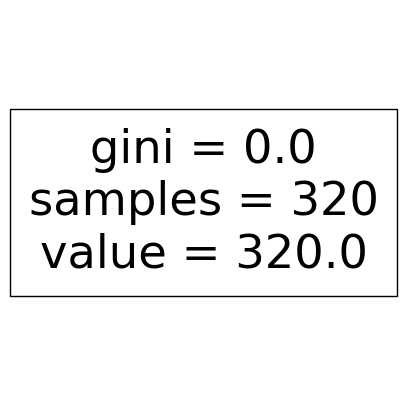

In [18]:
# Visualization: Decision Tree
plt.figure(figsize=(5, 5))
plot_tree(tree_model, filled=True, feature_names=X.columns, class_names=data['Sale_Category'].cat.categories)
plt.show()

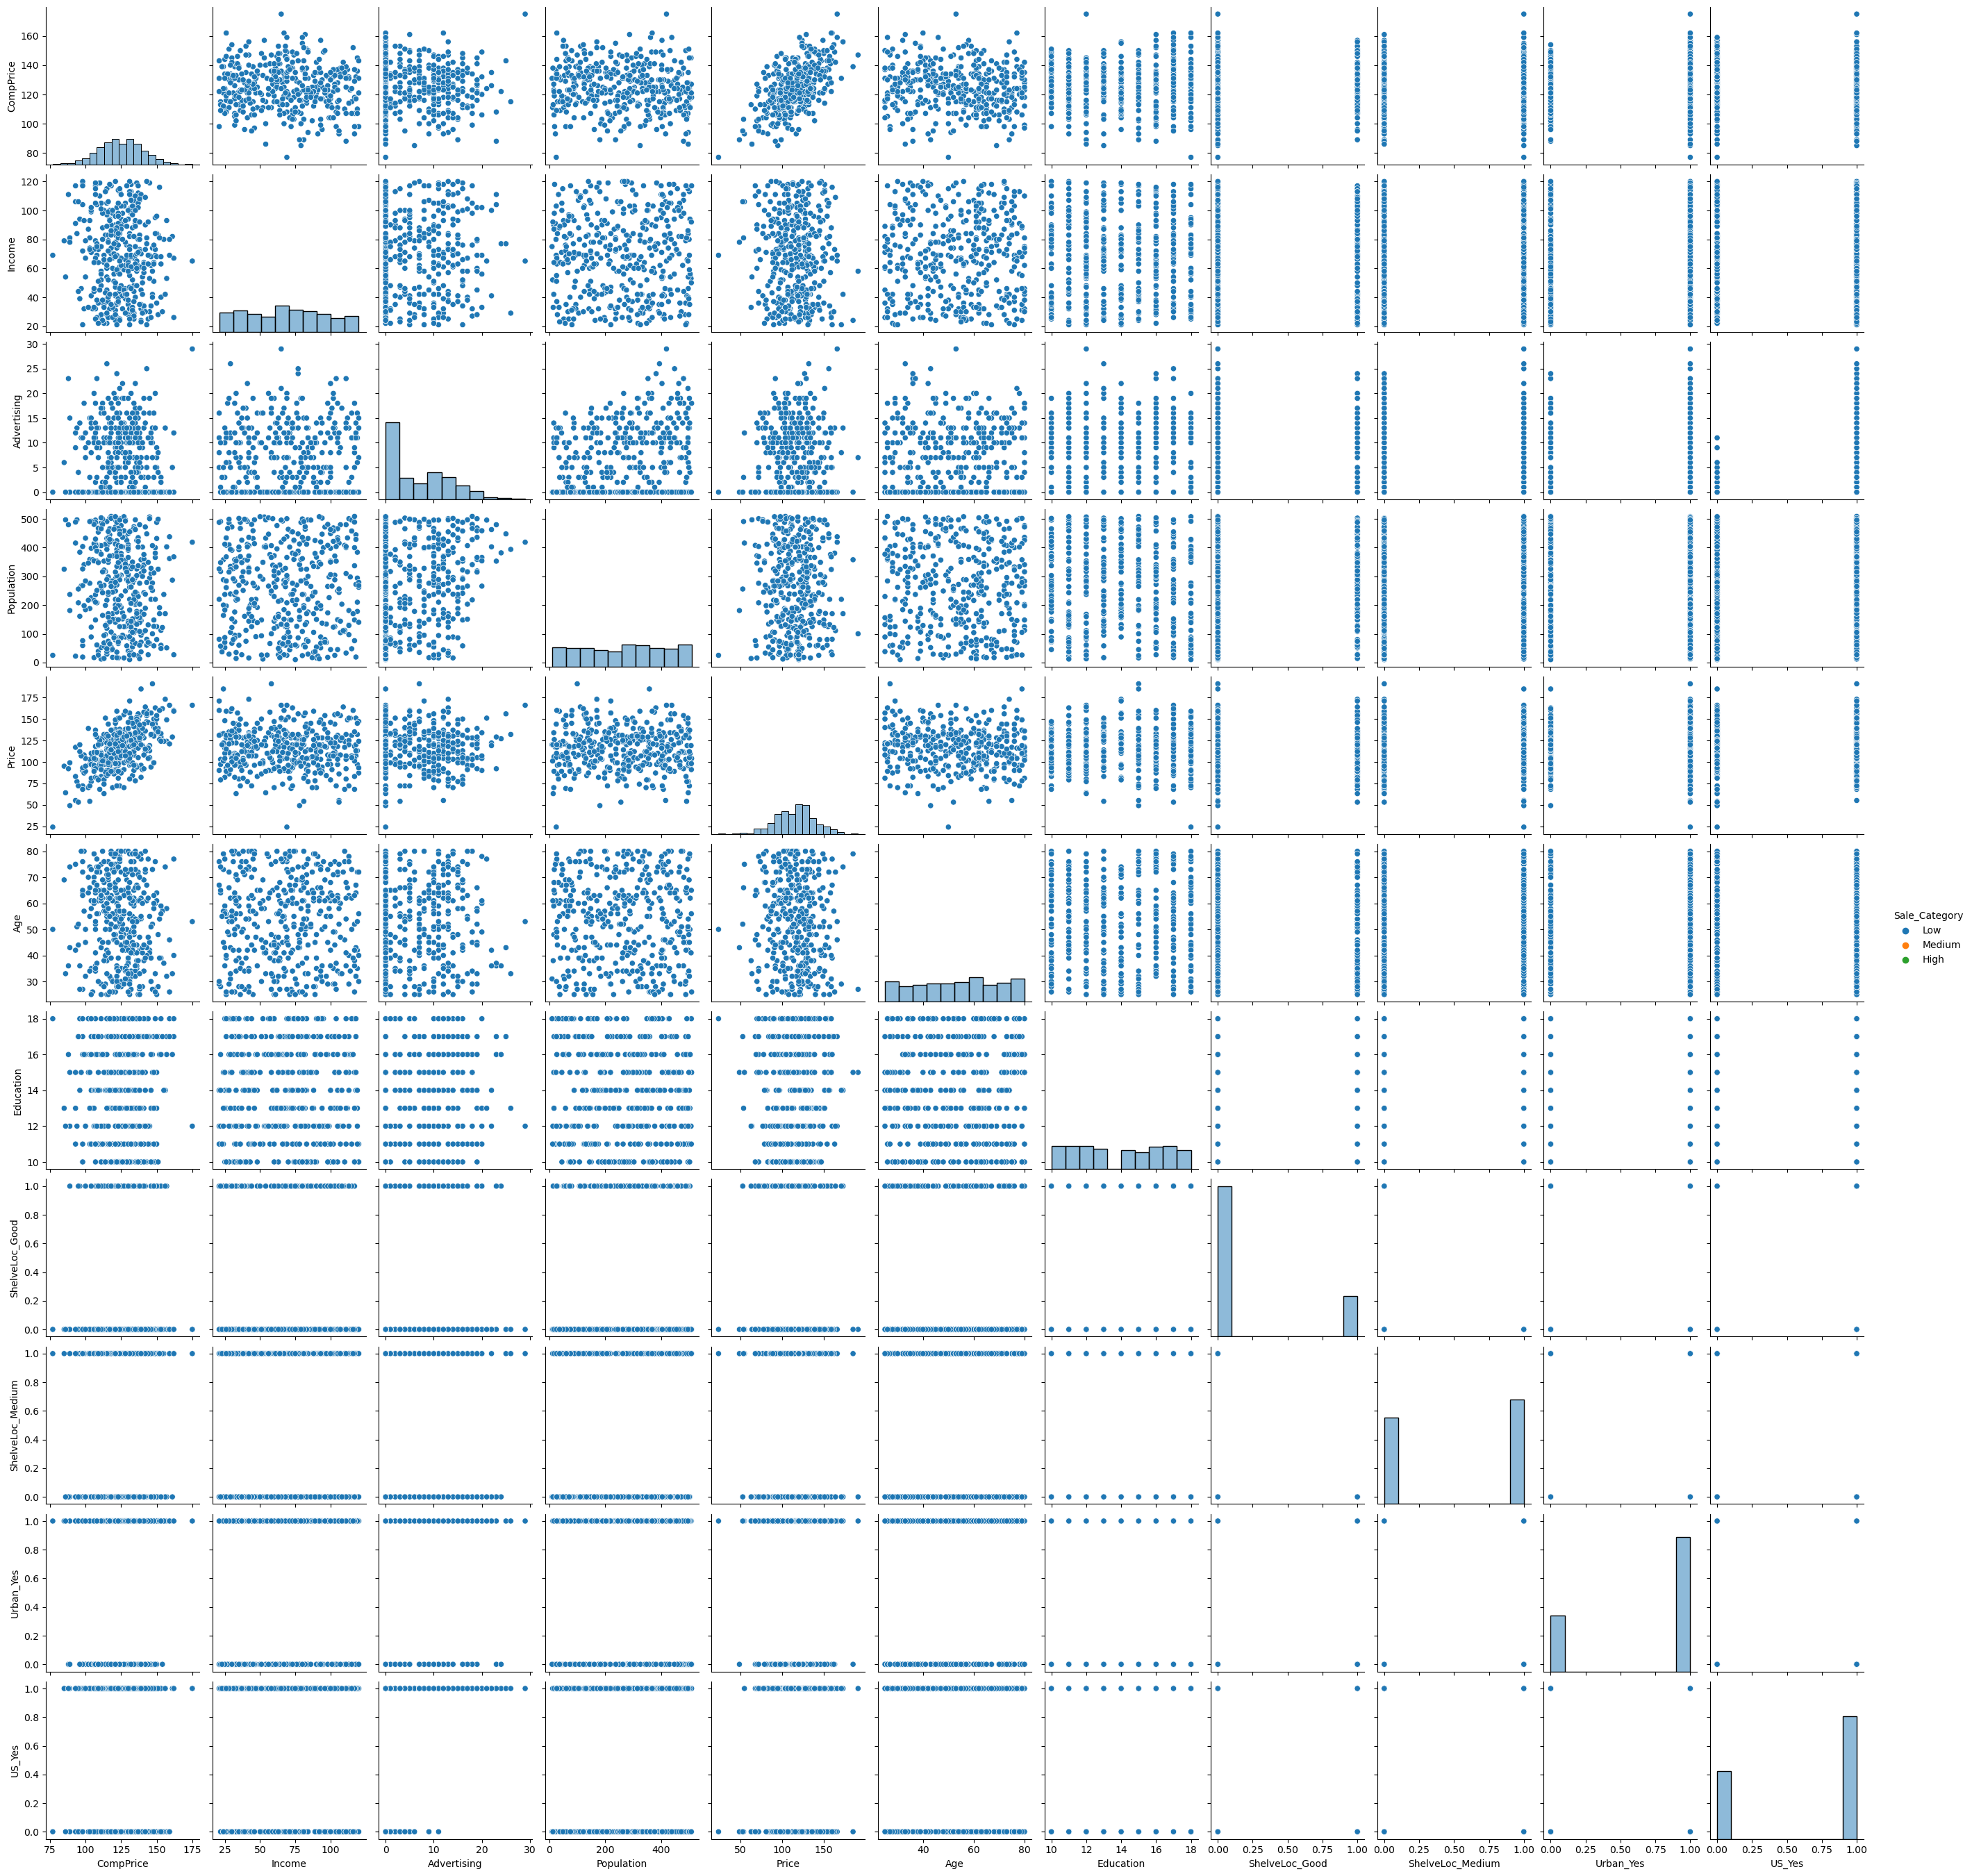

In [22]:
# Initial Data Exploration: Pairplot
import seaborn as sns
sns.pairplot(data, hue='Sale_Category', diag_kind='hist')
plt.show()



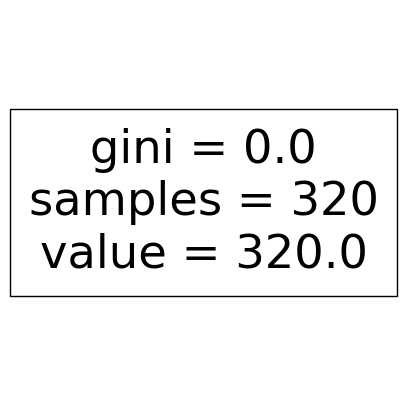

In [24]:
# Visualization: Decision Tree
plt.figure(figsize=(5, 5))
plot_tree(tree_model, filled=True, feature_names=X.columns, class_names=data['Sale_Category'].cat.categories)
plt.show()

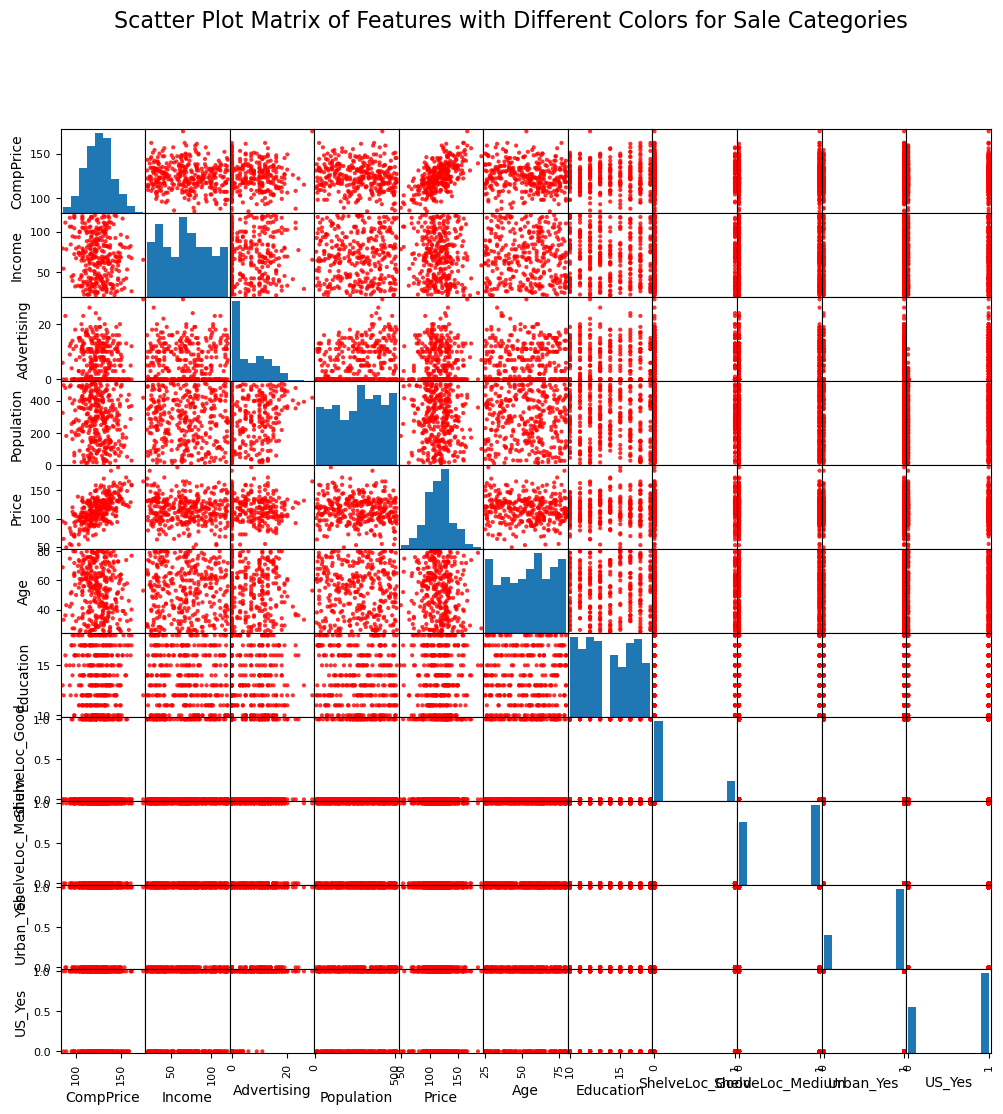

In [27]:
# Scatter Plot of Features with Different Colors for Sale Categories
from pandas.plotting import scatter_matrix

# Combine features and target variable for plotting
plot_data = pd.concat([X_train, y_train], axis=1)

# Scatter Matrix with different colors for Sale categories
colors = {'Low': 'red', 'Medium': 'green', 'High': 'blue'}
scatter_matrix(plot_data, alpha=0.8, figsize=(12, 12), diagonal='hist', c=plot_data['Sale_Category'].map(colors))
plt.suptitle('Scatter Plot Matrix of Features with Different Colors for Sale Categories', size=16)
plt.show()


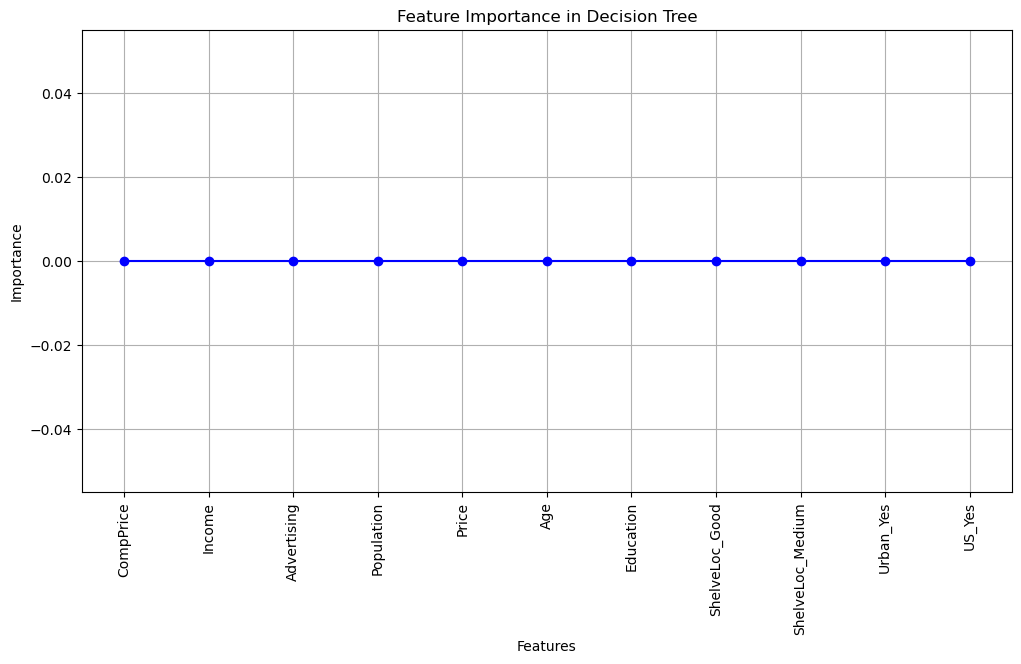

In [29]:
# Feature Importance Line Chart
plt.figure(figsize=(12, 6))
plt.plot(features, feature_importance, marker='o', linestyle='-', color='b')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance in Decision Tree')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()
